#### **Importing necessary libraries:**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#### **Loading and pre-processing the data:**

In [2]:
cd "/content/drive/MyDrive/TextMining_Project"

/content/drive/MyDrive/TextMining_Project


In [3]:
df = pd.read_csv("countvectorized_data.csv")
df.head()

,10,16,19,2024,2025,230,abc,about,access,act,...,with,work,working,world,worry,year,york,you,your,bert_label
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,strongly pro-regulation
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,anti-regulation
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,anti-regulation
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,strongly pro-regulation
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,anti-regulation


In [4]:
df.rename(columns={'bert_label': 'label'}, inplace=True)
df.head()

,10,16,19,2024,2025,230,abc,about,access,act,...,with,work,working,world,worry,year,york,you,your,label
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,strongly pro-regulation
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,anti-regulation
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,anti-regulation
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,strongly pro-regulation
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,anti-regulation


#### **Preparing the data for Supervised ML Algorithms:**

In [5]:
X = df.drop(columns=['label'])
y = df['label']

In [6]:
# Splitting the data into training and testing data using the 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
X_train

,10,16,19,2024,2025,230,abc,about,access,act,...,will,with,work,working,world,worry,year,york,you,your
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
642,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train

,label
261,anti-regulation
725,anti-regulation
583,weakly pro-regulation
840,strongly pro-regulation
153,anti-regulation
...,...
881,anti-regulation
642,weakly pro-regulation
803,weakly pro-regulation
409,anti-regulation


In [9]:
X_test

,10,16,19,2024,2025,230,abc,about,access,act,...,will,with,work,working,world,worry,year,york,you,your
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
805,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
y_test

,label
606,weakly pro-regulation
668,anti-regulation
570,strongly pro-regulation
885,neutral
687,anti-regulation
...,...
397,neutral
1048,strongly pro-regulation
805,anti-regulation
854,anti-regulation


### **NAIVE BAYES ALGORITHM:**

In [11]:
# Training and Testing the Multinomial Naive Bayes model

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [12]:
# Predicted probabilities
y_proba = model.predict_proba(X_test)
proba_df = pd.DataFrame(y_proba, columns=model.classes_)

proba_df

,anti-regulation,neutral,strongly pro-regulation,weakly pro-regulation
0,0.876364,0.012486,0.099092,0.012058
1,0.042957,0.000448,0.453089,0.503505
2,0.861556,0.000818,0.131523,0.006103
3,0.452511,0.002757,0.148406,0.396326
4,0.860730,0.000387,0.023604,0.115279
...,...,...,...,...
206,0.067257,0.031845,0.772274,0.128624
207,0.019146,0.000141,0.976431,0.004282
208,0.315621,0.000190,0.067054,0.617134
209,0.152334,0.007074,0.747585,0.093007


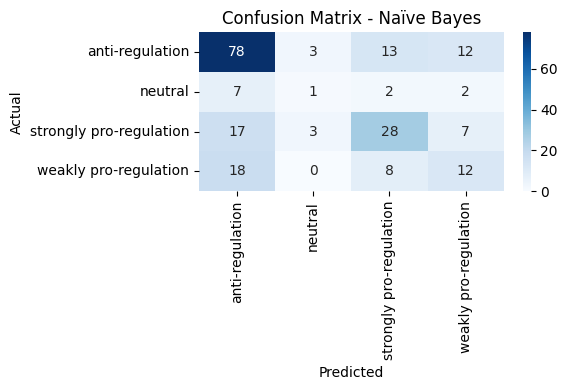

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix - Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [14]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 56.40%


In [15]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                         precision    recall  f1-score   support

        anti-regulation       0.65      0.74      0.69       106
                neutral       0.14      0.08      0.11        12
strongly pro-regulation       0.55      0.51      0.53        55
  weakly pro-regulation       0.36      0.32      0.34        38

               accuracy                           0.56       211
              macro avg       0.43      0.41      0.42       211
           weighted avg       0.54      0.56      0.55       211



### **DECISION TREES**

**Decision Tree-1:**

In [16]:
dt1_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

dt1_model.fit(X_train, y_train)
y_pred = dt1_model.predict(X_test)

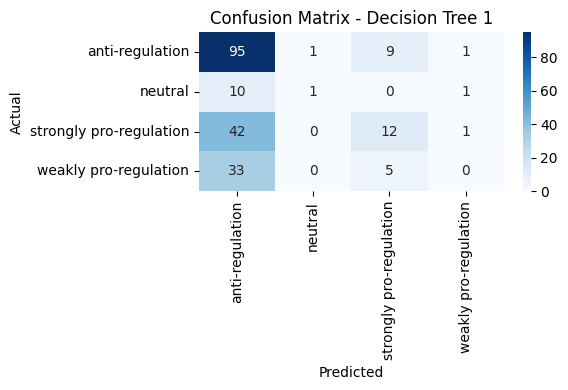

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dt1_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=dt1_model.classes_,
                yticklabels=dt1_model.classes_)
plt.title(f"Confusion Matrix - Decision Tree 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [18]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 51.18%


In [19]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                         precision    recall  f1-score   support

        anti-regulation       0.53      0.90      0.66       106
                neutral       0.50      0.08      0.14        12
strongly pro-regulation       0.46      0.22      0.30        55
  weakly pro-regulation       0.00      0.00      0.00        38

               accuracy                           0.51       211
              macro avg       0.37      0.30      0.28       211
           weighted avg       0.41      0.51      0.42       211



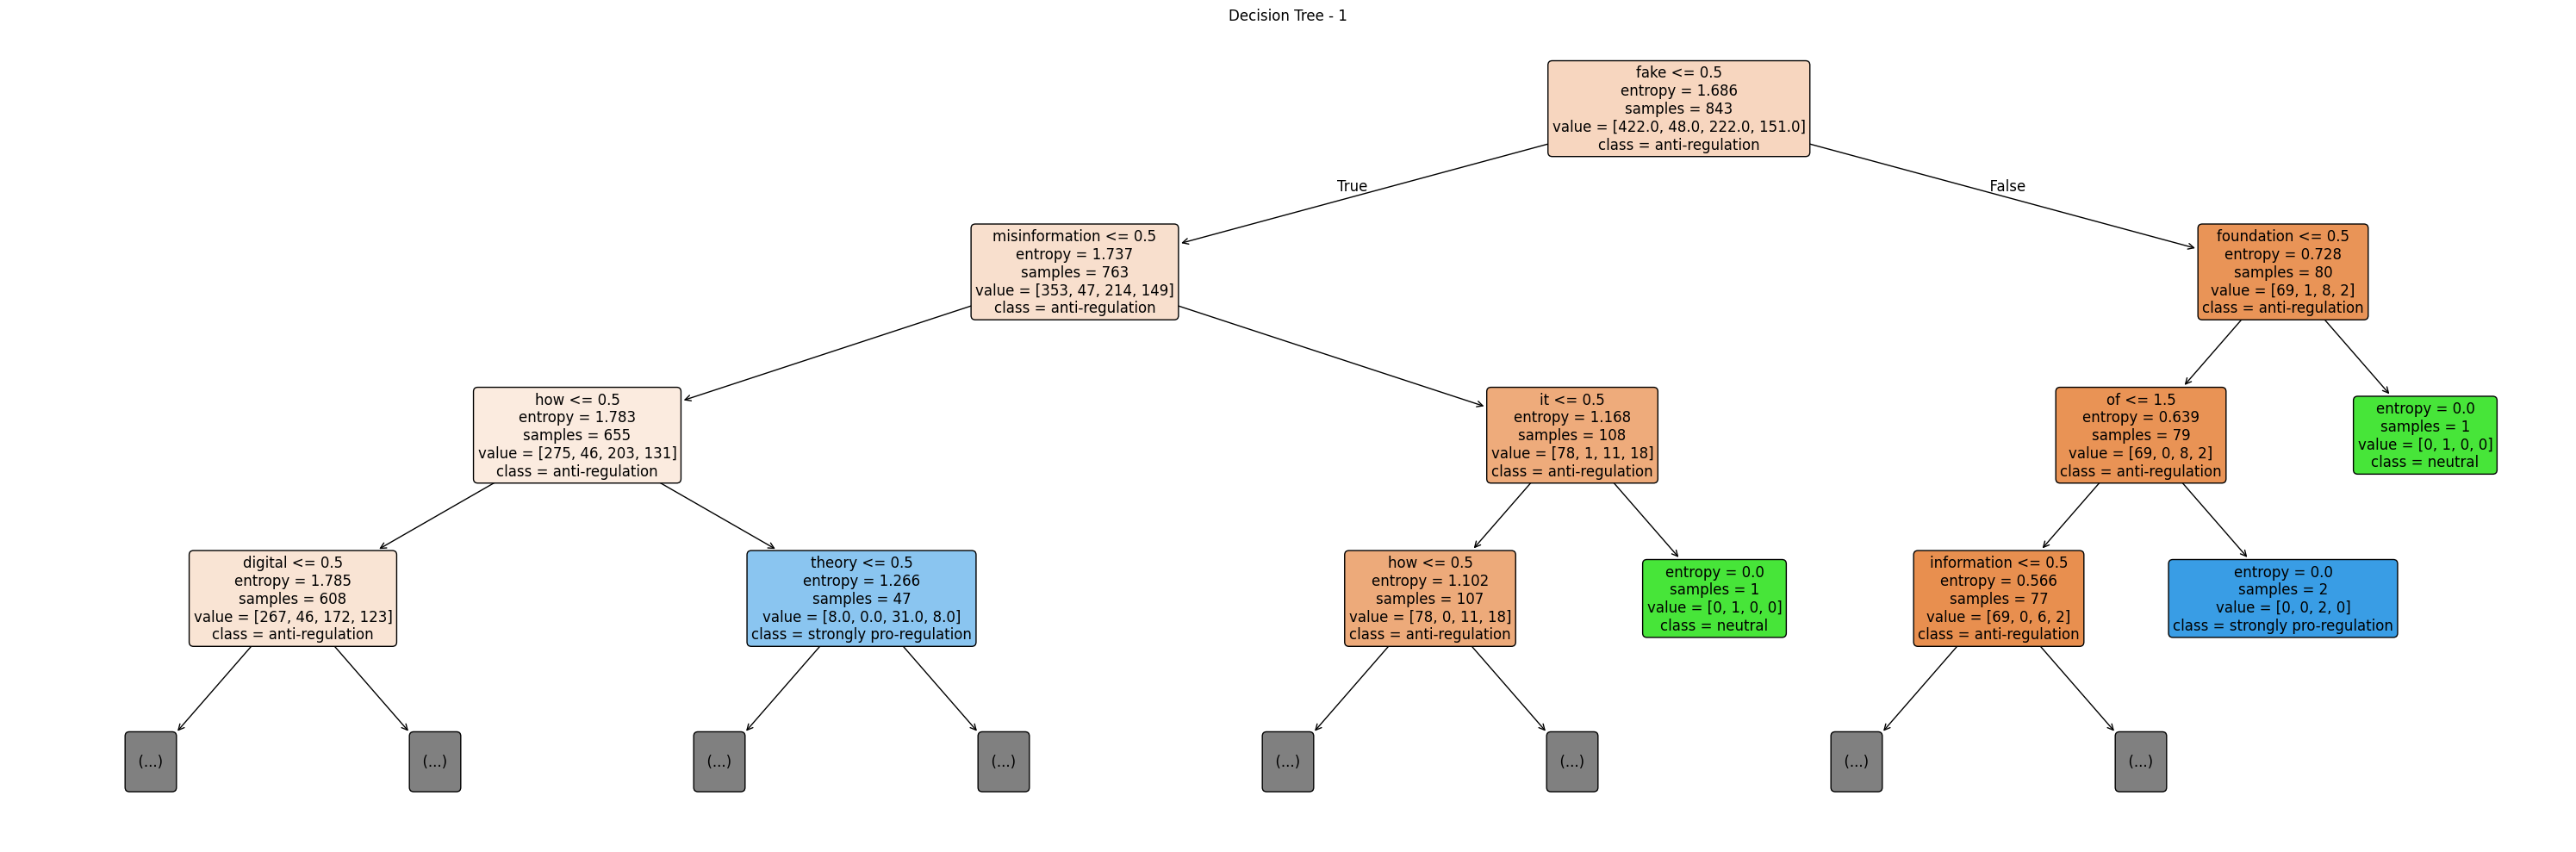

In [20]:
# Decision Tree - 1
plt.figure(figsize=(30, 10))
plot_tree(dt1_model, feature_names=X.columns, class_names=dt1_model.classes_, filled=True, rounded=True, max_depth=3, fontsize=12)

plt.title(f"Decision Tree - 1")
plt.tight_layout()
plt.show()

**Decision Tree-2:**

In [21]:
dt2_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=2)
dt2_model.fit(X_train, y_train)

y_pred = dt2_model.predict(X_test)

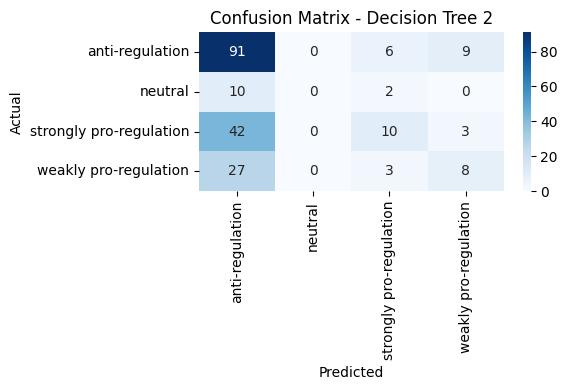

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dt2_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=dt2_model.classes_,
                yticklabels=dt2_model.classes_)
plt.title(f"Confusion Matrix - Decision Tree 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [23]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 51.66%


In [24]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                         precision    recall  f1-score   support

        anti-regulation       0.54      0.86      0.66       106
                neutral       0.00      0.00      0.00        12
strongly pro-regulation       0.48      0.18      0.26        55
  weakly pro-regulation       0.40      0.21      0.28        38

               accuracy                           0.52       211
              macro avg       0.35      0.31      0.30       211
           weighted avg       0.47      0.52      0.45       211



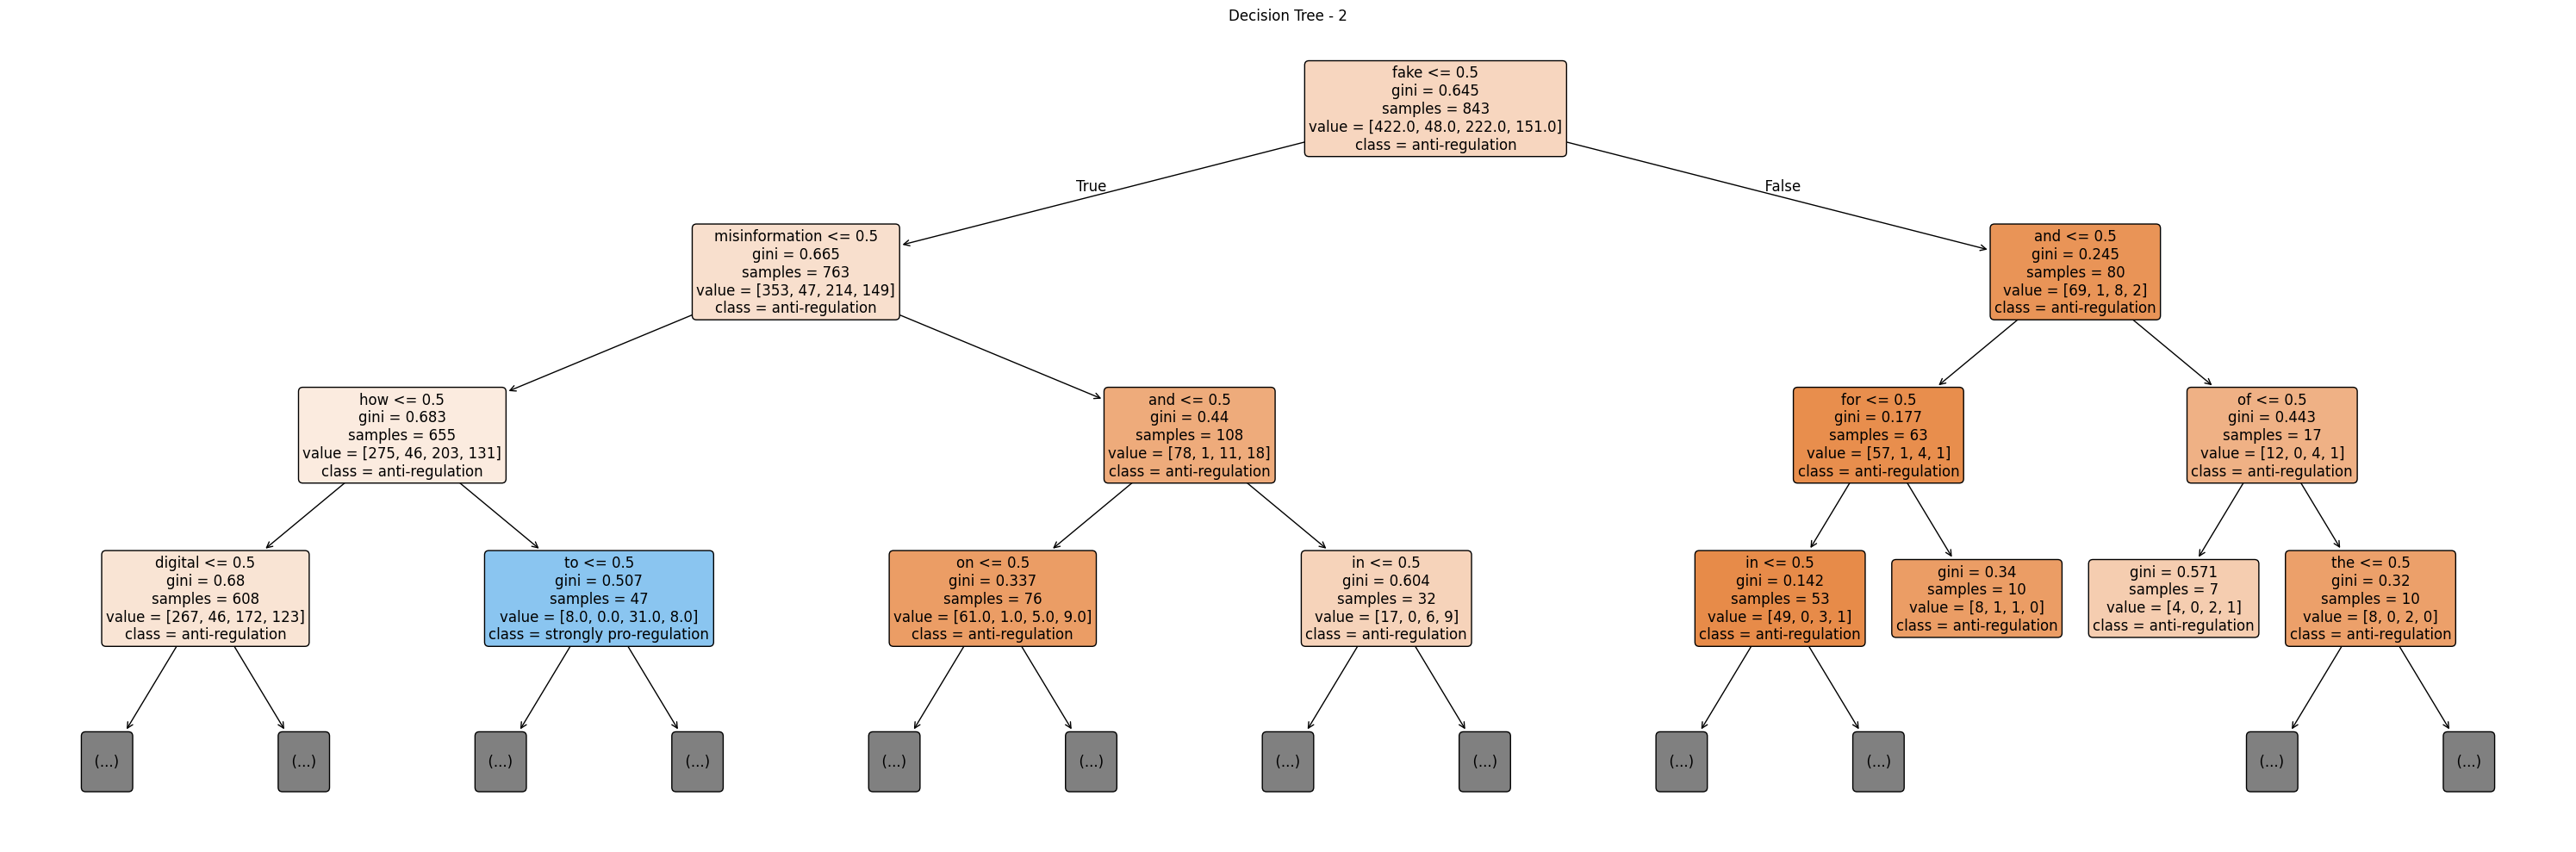

In [25]:
# Decision Tree - 2
plt.figure(figsize=(30, 10))
plot_tree(dt2_model, feature_names=X.columns, class_names=dt2_model.classes_, filled=True, rounded=True, max_depth=3, fontsize=12)

plt.title(f"Decision Tree - 2")
plt.tight_layout()
plt.show()

**Decision Tree-3:**

In [26]:
dt3_model = DecisionTreeClassifier(criterion='entropy', max_features=50, random_state=3)
dt3_model.fit(X_train, y_train)

y_pred = dt3_model.predict(X_test)

In [27]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 47.87%


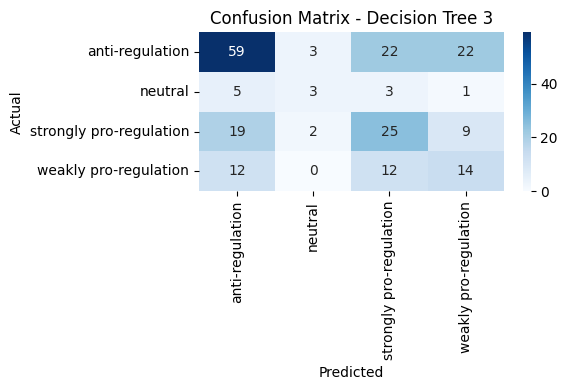

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dt3_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=dt3_model.classes_,
                yticklabels=dt3_model.classes_)
plt.title(f"Confusion Matrix - Decision Tree 3")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [29]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                         precision    recall  f1-score   support

        anti-regulation       0.62      0.56      0.59       106
                neutral       0.38      0.25      0.30        12
strongly pro-regulation       0.40      0.45      0.43        55
  weakly pro-regulation       0.30      0.37      0.33        38

               accuracy                           0.48       211
              macro avg       0.43      0.41      0.41       211
           weighted avg       0.49      0.48      0.48       211



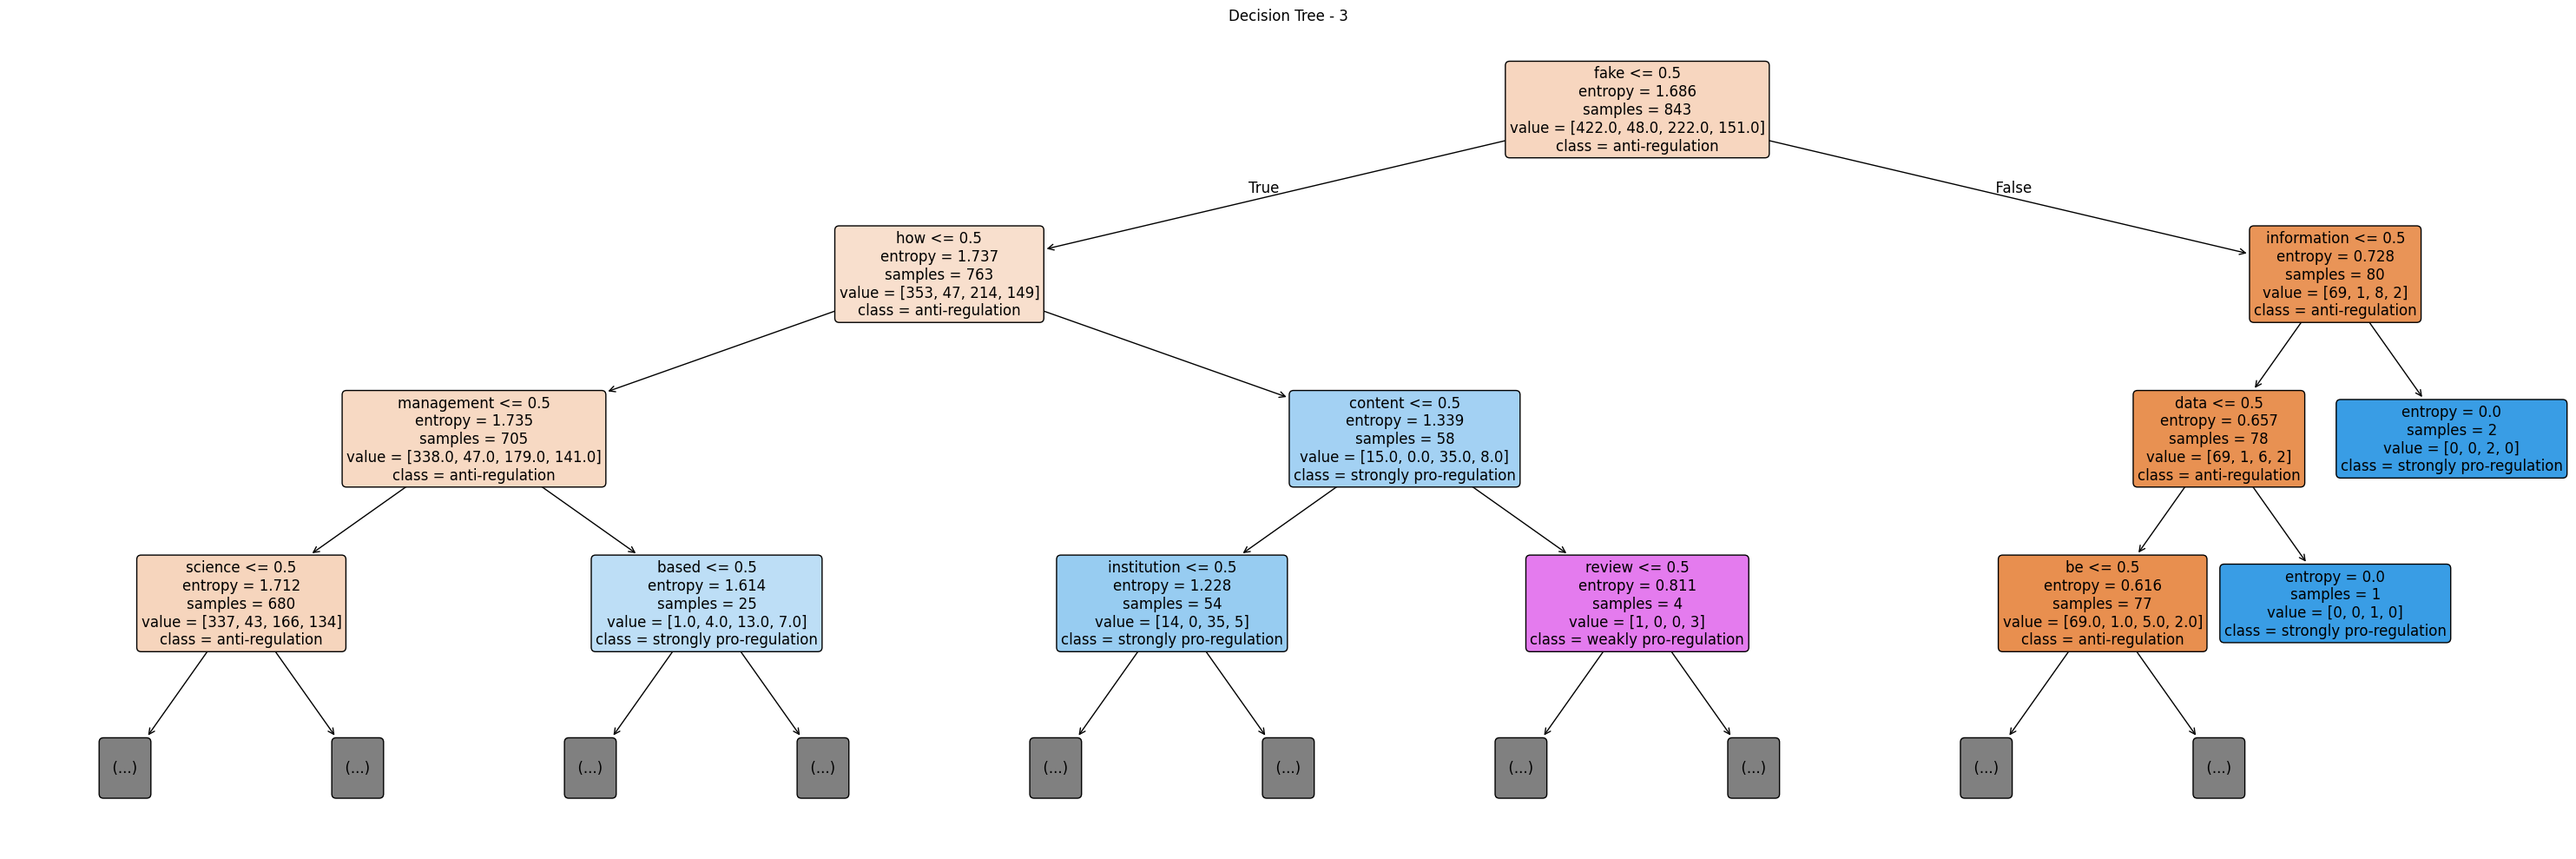

In [30]:
# Decision Tree - 3

plt.figure(figsize=(30, 10))
plot_tree(dt3_model, feature_names=X.columns, class_names=dt3_model.classes_, filled=True, rounded=True, max_depth=3, fontsize=12)

plt.title(f"Decision Tree - 3")
plt.tight_layout()
plt.show()

### **SUPPORT VECTOR MACHINE (SVM)**

**Linear Kernel:**

In [31]:
# SVM with Linear Kernel
linear_svm_model = SVC(kernel="linear", C=2.0, probability=True)
linear_svm_model.fit(X_train, y_train)

y_pred = linear_svm_model.predict(X_test)

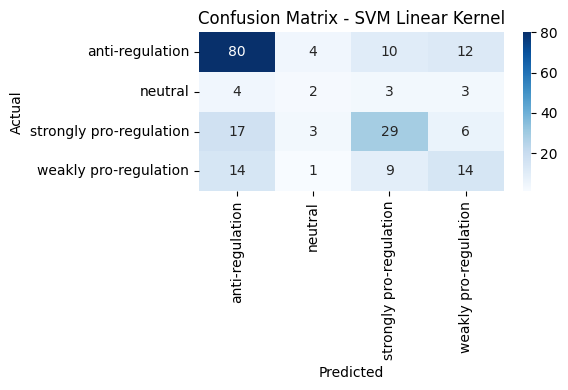

In [32]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=linear_svm_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=linear_svm_model.classes_,
            yticklabels=linear_svm_model.classes_)
plt.title("Confusion Matrix - SVM Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [33]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 59.24%


In [34]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                         precision    recall  f1-score   support

        anti-regulation       0.70      0.75      0.72       106
                neutral       0.20      0.17      0.18        12
strongly pro-regulation       0.57      0.53      0.55        55
  weakly pro-regulation       0.40      0.37      0.38        38

               accuracy                           0.59       211
              macro avg       0.47      0.45      0.46       211
           weighted avg       0.58      0.59      0.59       211



**RBF Kernel:**

In [35]:
rbf_svm_model = SVC(kernel="rbf", C=3.0, gamma="scale", probability=True)
rbf_svm_model.fit(X_train, y_train)

y_pred = rbf_svm_model.predict(X_test)

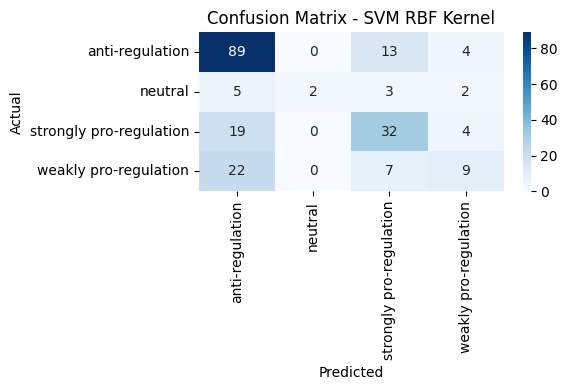

In [36]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=rbf_svm_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rbf_svm_model.classes_,
            yticklabels=rbf_svm_model.classes_)
plt.title("Confusion Matrix - SVM RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [37]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 62.56%


In [38]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                         precision    recall  f1-score   support

        anti-regulation       0.66      0.84      0.74       106
                neutral       1.00      0.17      0.29        12
strongly pro-regulation       0.58      0.58      0.58        55
  weakly pro-regulation       0.47      0.24      0.32        38

               accuracy                           0.63       211
              macro avg       0.68      0.46      0.48       211
           weighted avg       0.63      0.63      0.60       211



**Polynomial Kernel:**

In [39]:
poly_svm_model = SVC(kernel="poly", degree=3, C=2.0, probability=True)
poly_svm_model.fit(X_train, y_train)

y_pred = poly_svm_model.predict(X_test)

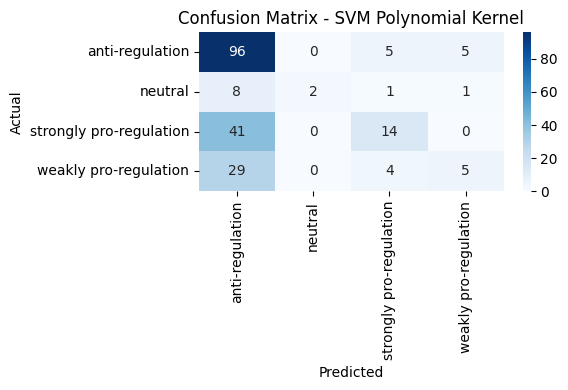

In [40]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=poly_svm_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=poly_svm_model.classes_,
            yticklabels=poly_svm_model.classes_)
plt.title("Confusion Matrix - SVM Polynomial Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [41]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 55.45%


In [42]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                         precision    recall  f1-score   support

        anti-regulation       0.55      0.91      0.69       106
                neutral       1.00      0.17      0.29        12
strongly pro-regulation       0.58      0.25      0.35        55
  weakly pro-regulation       0.45      0.13      0.20        38

               accuracy                           0.55       211
              macro avg       0.65      0.36      0.38       211
           weighted avg       0.57      0.55      0.49       211



### **SVM for sentiment classification**

In [43]:
# Mapping sentiment
def map_sentiment(label):
    label = label.lower()
    if "anti" in label:
        return "negative"
    elif "pro" in label:
        return "positive"
    else:
        return "neutral"

df['sentiment'] = df['label'].apply(map_sentiment)

X = df.drop(columns=['label', 'sentiment'])
y = df['sentiment']


# Train-Test Split after mapping the sentiment
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [44]:
svm_sentiment_model = SVC(kernel="rbf", C=2.0, probability=True)
svm_sentiment_model.fit(X_train, y_train)

y_pred = svm_sentiment_model.predict(X_test)

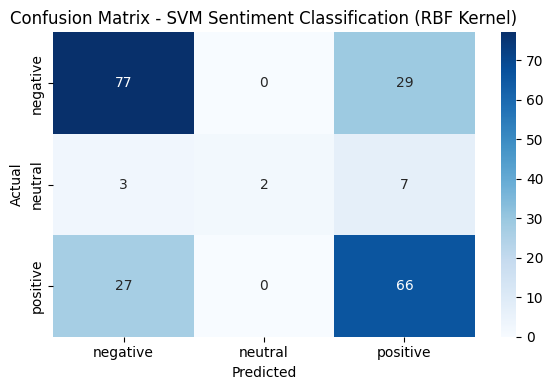

In [45]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred, labels=svm_sentiment_model.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm_sentiment_model.classes_,
            yticklabels=svm_sentiment_model.classes_)
plt.title("Confusion Matrix - SVM Sentiment Classification (RBF Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [46]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 68.72%


In [47]:
# Classification report
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

    negative       0.72      0.73      0.72       106
     neutral       1.00      0.17      0.29        12
    positive       0.65      0.71      0.68        93

    accuracy                           0.69       211
   macro avg       0.79      0.53      0.56       211
weighted avg       0.70      0.69      0.68       211

